In [ ]:
Загрузка библиотек. 

In [5]:
import pandas as pd
import numpy as np

In [44]:
! pip install bootstrapped

You should consider upgrading via the 'C:\Users\ПК\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [45]:
import bootstrapped.bootstrap as bs
import bootstrapped.compare_functions as bs_compare
import bootstrapped.stats_functions as bs_stats

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [47]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [48]:
df = pd.read_csv("результаты А_B - cookie_cats 2.csv")

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  int64 
 4   retention_7     90189 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ MB


In [50]:
df.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,9.018900e+04,90189.000000,90189.000000,90189.000000
mean,4.998412e+06,51.872457,0.445210,0.186065
std,2.883286e+06,195.050858,0.496992,0.389161
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.512230e+06,5.000000,0.000000,0.000000
50%,4.995815e+06,16.000000,0.000000,0.000000
75%,7.496452e+06,51.000000,1.000000,0.000000
max,9.999861e+06,49854.000000,1.000000,1.000000


In [51]:
df.head(10)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1
5,540,gate_40,187,1,1
6,1066,gate_30,0,0,0
7,1444,gate_40,2,0,0
8,1574,gate_40,108,1,1
9,1587,gate_40,153,1,0


In [52]:
(df['version'] == 'gate_30') & (df['sum_gamerounds'] == '0')

0        False
1        False
2        False
3        False
4        False
         ...  
90184    False
90185    False
90186    False
90187    False
90188    False
Length: 90189, dtype: bool

In [53]:
df[(df['version'] == 'gate_30') & (df['sum_gamerounds'] == '0')]

,userid,version,sum_gamerounds,retention_1,retention_7


In [54]:
(df['version'] == 'gate_40') & (df['sum_gamerounds'] == '0')

0        False
1        False
2        False
3        False
4        False
         ...  
90184    False
90185    False
90186    False
90187    False
90188    False
Length: 90189, dtype: bool

In [55]:
df[(df['version'] == 'gate_40') & (df['sum_gamerounds'] == '0')]

,userid,version,sum_gamerounds,retention_1,retention_7


In [56]:
df['version'].value_counts()

version
gate_40    45489
gate_30    44700
Name: count, dtype: int64

In [57]:
df[['userid']].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
90184    False
90185    False
90186    False
90187    False
90188    False
Length: 90189, dtype: bool

In [58]:
df[df[['userid']].duplicated()]

,userid,version,sum_gamerounds,retention_1,retention_7


In [59]:
a = df[(df['version'] == 'gate_30') & (df['sum_gamerounds'] == '0')]
b = df[(df['version'] == 'gate_40') & (df['sum_gamerounds'] == '0')]

In [60]:
stats.chisquare(b['version'], a['version'])

Power_divergenceResult(statistic=0, pvalue=nan)

Text(0, 0.5, 'Версия игры')

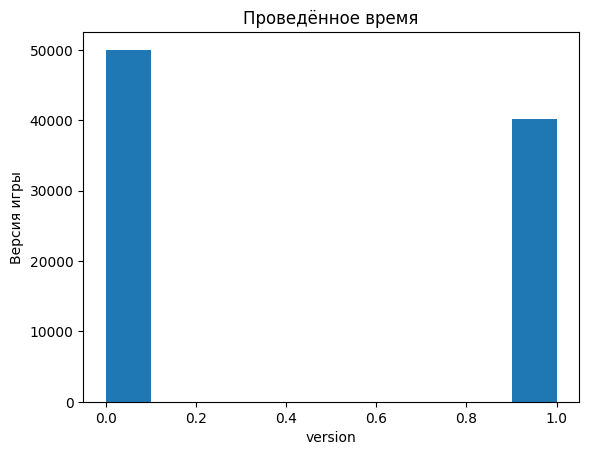

In [61]:
plt.hist(df['retention_1'])
plt.title('Проведённое время')
plt.xlabel('version')
plt.ylabel('Версия игры')

Text(0, 0.5, 'количество')

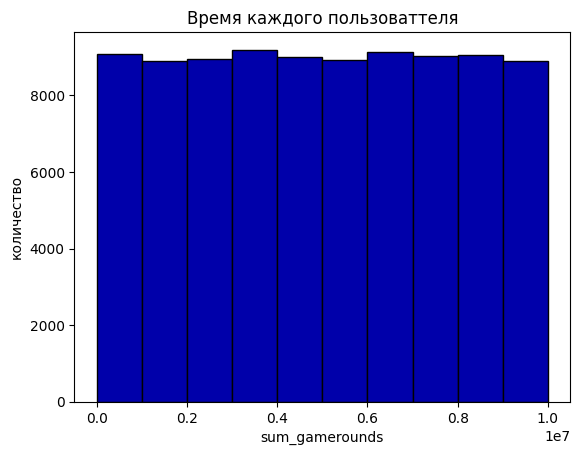

In [62]:
plt.hist(df['userid'], edgecolor='black', color='#0000AA')
plt.title('Время каждого пользоваттеля')
plt.xlabel('sum_gamerounds')
plt.ylabel('количество')

Text(0.5, 1.0, 'Распределение времени по версиям')

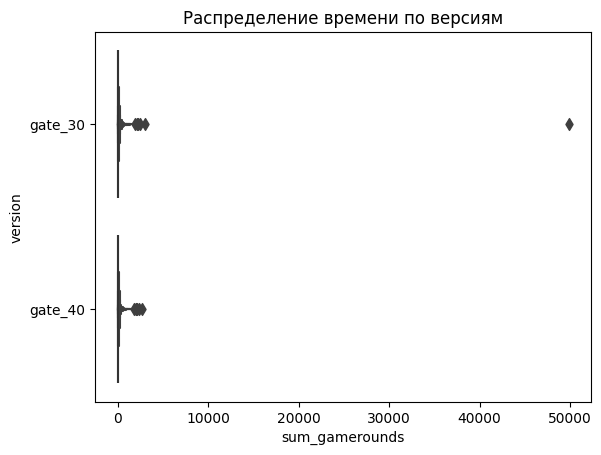

In [63]:
sns.boxenplot(x=df['sum_gamerounds'], y=df['version'])
plt.xlabel('sum_gamerounds')
plt.ylabel('version')
plt.title('Распределение времени по версиям')

Text(0.5, 1.0, 'Распределение времени по версиям')

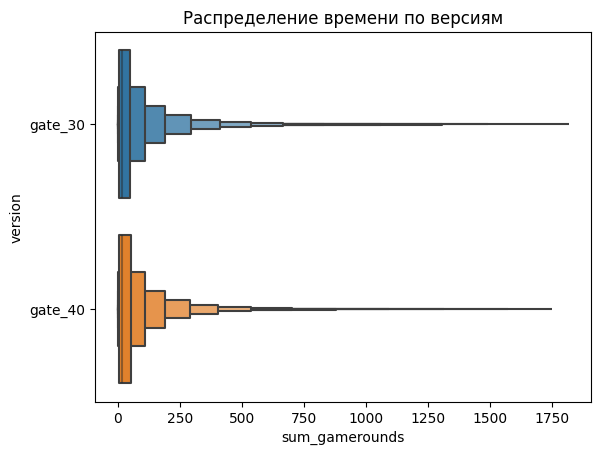

In [64]:
sns.boxenplot(x=df['sum_gamerounds'], y=df['version'], showfliers=False)
plt.xlabel('sum_gamerounds')
plt.ylabel('version')
plt.title('Распределение времени по версиям')

Text(0.5, 1.0, 'Удержание пользователей версиями в первый день')

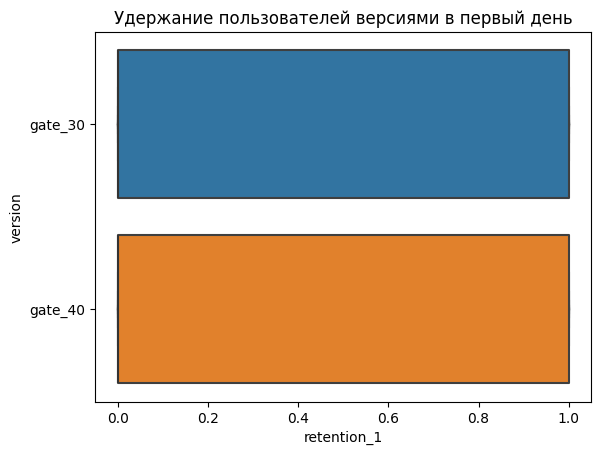

In [65]:
sns.boxenplot(x=df['retention_1'], y=df['version'], showfliers=False)
plt.xlabel('retention_1')
plt.ylabel('version')
plt.title('Удержание пользователей версиями в первый день')

Вот мои рекомендации на основе анализа результатов:
     - Возможно, стоит провести дополнительное AB-тестирование, чтобы определить оптимальный интерфейс для каждого этапа игры.
     - Продолжать исследовать влияние изменения сложности на выручку и оптимизировать игру для максимальной монетизации.
     - При необходимости, проведение дополнительного AB-тестирования, чтобы понять, как цена может влиять на поведение игроков и выручку.
     - Провести дополнительные исследования, чтобы понять, как изменения в параметрах игры могут повлиять на лояльность игроков и длительность 
       их активности.
     - Кроме того, рекомендую менеджеру продолжать использовать AB-тестирование, чтобы систематически тестировать новые идеи и варианты игры. 
       Это позволит определить наиболее эффективные стратегии и продолжать улучшать игровой опыт и монетизацию в Mobile Games с Cookie Cats.